In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import statistics as s

In [2]:
def load_data(train_batch_size, test_batch_size):
    train_data = torch.utils.data.DataLoader(
        datasets.CIFAR10('data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                       ])),
        batch_size=train_batch_size, shuffle=True)

    test_data = torch.utils.data.DataLoader(
        datasets.CIFAR10('data', train=False,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                       ])),
        batch_size=test_batch_size, shuffle=True)
    return (train_data, test_data)

In [3]:
class CustomNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
def model_optimizer(model):
    return optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)

In [5]:
def train(model, optimizer, train_data):
    model.train()

    for batch_idx, (data, target) in enumerate(train_data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [6]:
def calculate_loss(model, loader, loss_fn):
    correct_count = 0
    total = 0
    total_cost = 0
    cost_counter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            total_cost += cost
            cost_counter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct_count += 1
                total += 1
    return total_cost / cost_counter, round(correct_count/total, 3)

In [7]:
def compute(model, optimizer):
    loss_train_arr = []
    loss_test_arr = []
    test_acc_arr = []
    train_acc_arr = []
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_data)
        tr_loss, tr_acc = calculate_loss(model, train_data, loss_fn)
        t_loss, t_acc = calculate_loss(model, test_data, loss_fn)
        print("Model Train loss: ", tr_loss)
        loss_train_arr.append(tr_loss)
        loss_test_arr.append(t_loss)
        train_acc_arr.append(tr_acc)
        test_acc_arr.append(t_acc)
    return loss_train_arr, loss_test_arr, train_acc_arr, test_acc_arr

In [8]:
epochs = 30


In [9]:
loss_fn = torch.nn.CrossEntropyLoss()
train_data, test_data = load_data(500, 500)
model2 = CustomNet()
optimizer = model_optimizer(model2)
batch_2_train_loss, batch_2_test_loss, batch_2_train_acc, batch_2_test_acc = compute(model2, optimizer)

batch_param_2 = torch.nn.utils.parameters_to_vector(model2.parameters())

loss_fn = torch.nn.CrossEntropyLoss()
train_data, test_data = load_data(100, 100)
model1 = CustomNet()
optimizer = model_optimizer(model1)
batch_1_train_loss, batch_1_test_loss, batch_1_train_acc, batch_1_test_acc = compute(model1, optimizer)

batch_param_1 = torch.nn.utils.parameters_to_vector(model1.parameters())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Model Train loss:  tensor(2.2713)
Model Train loss:  tensor(1.9186)
Model Train loss:  tensor(1.6940)
Model Train loss:  tensor(1.5660)
Model Train loss:  tensor(1.4873)
Model Train loss:  tensor(1.4030)
Model Train loss:  tensor(1.3342)
Model Train loss:  tensor(1.2687)
Model Train loss:  tensor(1.2366)
Model Train loss:  tensor(1.1903)
Model Train loss:  tensor(1.1612)
Model Train loss:  tensor(1.1157)
Model Train loss:  tensor(1.1121)
Model Train loss:  tensor(1.0640)
Model Train loss:  tensor(1.0213)
Model Train loss:  tensor(1.0532)
Model Train loss:  tensor(1.0033)
Model Train loss:  tensor(0.9620)
Model Train loss:  tensor(0.9529)
Model Train loss:  tensor(0.9278)
Model Train loss:  tensor(0.9227)
Model Train loss:  tensor(0.9198)
Model Train loss:  tensor(0.8774)
Model Train loss:  tensor(0.8316)
Model Train loss:  tensor(0.8223)
Model Train loss:  tensor(0.8073)
Model Train loss:  tensor(0.8099)
Model Train loss:  tensor(0.7723)
M

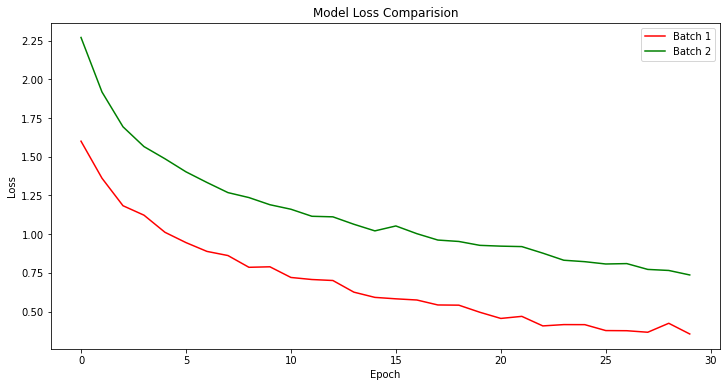

In [10]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_train_loss, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_train_loss, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Batch 1', 'Batch 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

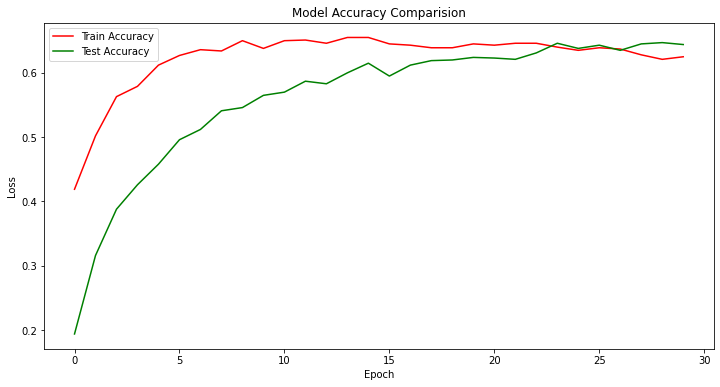

In [11]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_test_acc, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_test_acc, color = "g")
plt.title('Model Accuracy Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [12]:
alpha = np.linspace(-2.0, 2.0, num = 50)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch_param_1 + alpha[i]* batch_param_2
    thetaArr.append(theta)

In [13]:
alpha_tr_loss_arr = []
alpha_t_loss_arr = []
alpha_tr_acc_arr = []
alpha_t_acc_arr = []

In [15]:
for i in range (len(thetaArr)):
    torch.manual_seed(1)
    theta = (1-alpha[i])* batch_param_1 + alpha[i]*batch_param_2
    model = CustomNet()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()

    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    alpha_tr_loss, alpha_tr_acc = calculate_loss(model, train_data, loss_fn)
    alpha_t_loss, alpha_t_acc = calculate_loss(model, test_data, loss_fn)
    alpha_tr_loss_arr.append(alpha_tr_loss)
    alpha_tr_acc_arr.append(alpha_tr_acc)
    alpha_t_loss_arr.append(alpha_t_loss)
    alpha_t_acc_arr.append(alpha_t_acc)

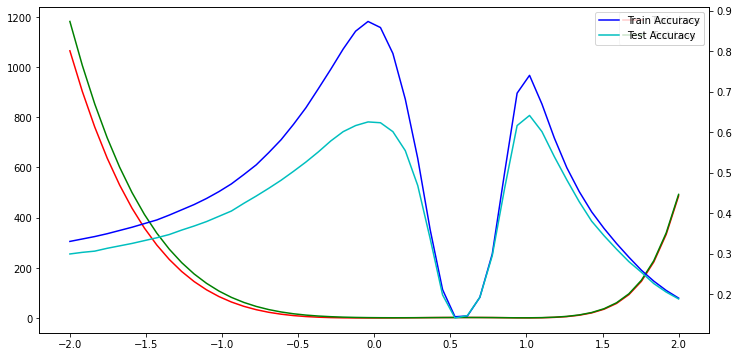

In [16]:
plt.figure(figsize=(12,6))
plt.plot(alpha, alpha_tr_loss_arr, color = "r")
plt.plot(alpha, alpha_t_loss_arr, color = "g")
plt.legend(['Train Loss' , 'Test Loss'])

plt.twinx()

plt.plot(alpha, alpha_tr_acc_arr, color = "b")
plt.plot(alpha, alpha_t_acc_arr, color = "c")
plt.legend(['Train Accuracy' , 'Test Accuracy'])

Batch Size 100 & 1000 LR = 1e-3


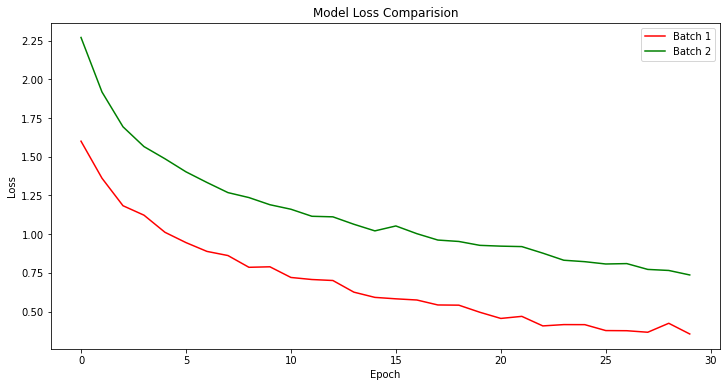

In [17]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_train_loss, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_train_loss, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Batch 1', 'Batch 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

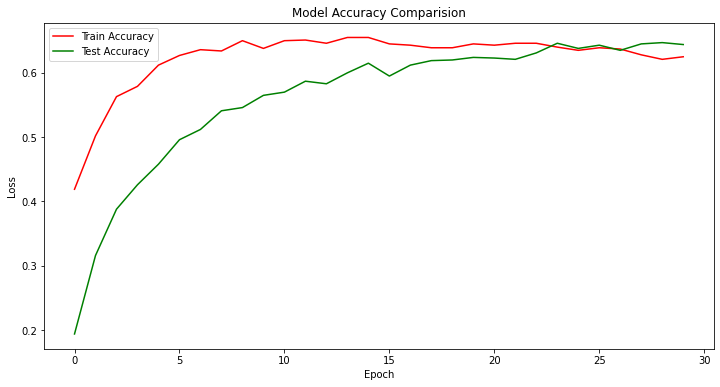

In [18]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_test_acc, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_test_acc, color = "g")
plt.title('Model Accuracy Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [19]:
alpha = np.linspace(-2.0, 2.0, num = 50)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch_param_1 + alpha[i]* batch_param_2
    thetaArr.append(theta)

In [20]:
alpha_tr_loss_arr = []
alpha_t_loss_arr = []
alpha_tr_acc_arr = []
alpha_t_acc_arr = []

In [22]:
for i in range (len(thetaArr)):
    torch.manual_seed(1)
    theta = (1-alpha[i])* batch_param_1 + alpha[i]*batch_param_2
    model = CustomNet()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()
    #optimizer = torch.optim.Adam(model.parameters(), lr=0.0004, weight_decay = 1e-4)

    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    alpha_tr_loss, alpha_tr_acc = calculate_loss(model, train_data, loss_fn)
    alpha_t_loss, alpha_t_acc = calculate_loss(model, test_data, loss_fn)
    alpha_tr_loss_arr.append(alpha_tr_loss)
    alpha_tr_acc_arr.append(alpha_tr_acc)
    alpha_t_loss_arr.append(alpha_t_loss)
    alpha_t_acc_arr.append(alpha_t_acc)

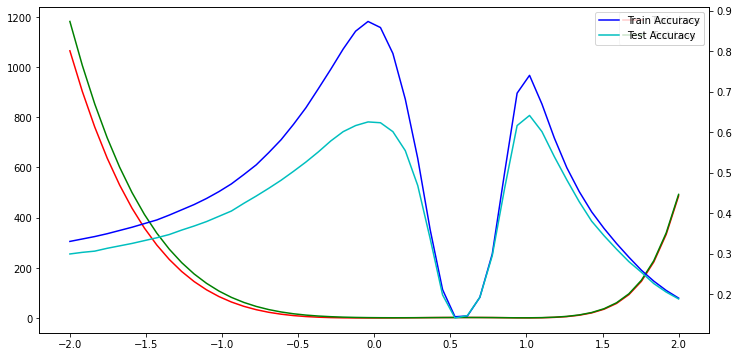

In [23]:
plt.figure(figsize=(12,6))
plt.plot(alpha, alpha_tr_loss_arr, color = "r")
plt.plot(alpha, alpha_t_loss_arr, color = "g")
plt.legend(['Train Loss' , 'Test Loss'])

plt.twinx()

plt.plot(alpha, alpha_tr_acc_arr, color = "b")
plt.plot(alpha, alpha_t_acc_arr, color = "c")
plt.legend(['Train Accuracy' , 'Test Accuracy'])